### Week-4

### Objective:  

Objective: Build a Logistic Regression model to classify the phishing websites and incorporate the random searching process to improve its predictive performance.

### 1. Imports

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

It is difficult to reproduce the same results across runs for our machine learning model — even when we run the same script on the same training data. 

It could also lead to challenges in figuring out whether a change in performance is due to an actual model or data modification, or merely the result of a new random sample.

These sources of variation can be tackled to have full visibility into the data, model and parameters, and details on the environment that led to a specific result. This level of reproducibility will reduce unexpected variations across our runs and help us debug machine learning experiments.

To achive reproducability, randomness appears in machine learning ---- to achieve reproducible, deterministic, and more generalizable results we can carefully set the random seed.

We carefully set that seed variable for all of our frameworks

In [4]:
np.random.seed(123)
tf.random.set_seed(123)

## 2. The Data

### 2.1 Load the data....

In [5]:
df = pd.read_csv('Phishing.csv')

### 2.2 Explore the data

It's important to look at our data, to make sure we understand the format, how it's stored, what type of values it holds, etc. Even if we've read descriptions about our data, the actual data may not be what we expect.

In [6]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


 The dataset has a large number of features, so we modify the output a bit to make it fit the screen.
 

In [7]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


### 2.2 The exact dimensions of the dataset

In [8]:
df.shape

(11055, 31)

The ndim attribute returns the number of dimensions of  DataFrame or Series. It will always be 2 for DataFrames and 1 for Series

In [9]:
df.ndim

2

### 2.3 Unique Labels in the dataset

The labels of the dataset are given in the Result column. We can explore the unique labels in Result column.

In [10]:
unique_Labels = df.Result.unique()

In [11]:
unique_Labels

array([-1,  1])

In [12]:
unique_Labels.size

2

In [13]:
print ("The Result column has ", unique_Labels.size ," unique values i.e.", unique_Labels)

The Result column has  2  unique values i.e. [-1  1]


### Summary of dataset

In [14]:
(rows,cols)= df.shape  
print ("The fishing dataset has ",rows," samples and ",cols, "features")
print("The dataset has ", df.ndim, "dimensions")
print ("The Result column has ", unique_Labels.size ," unique values i.e.", unique_Labels)

The fishing dataset has  11055  samples and  31 features
The dataset has  2 dimensions
The Result column has  2  unique values i.e. [-1  1]


In [15]:
#find the class distribution of the websites.  
df_class_dist = df['Result'].value_counts().rename_axis('Class-Label').reset_index(name='Number of Observations')

In [16]:
#arrange and convert them to a pandas DataFrame.
df_class_dist

,Class-Label,Number of Observations
0,1,6157
1,-1,4898


### 2.4 Visualize the data

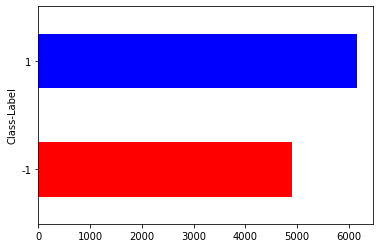

In [17]:

#convert the DataFrame to a bar plot using the matplotlib library.

df_class_dist.groupby('Class-Label')['Number of Observations'].sum().plot(kind='barh', color=['red', 'blue']);


### 2.5 Summary Statistics of Data

In [18]:
#extract summary statistics from the data
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


### 2.6 Feature exploration

In [19]:
#Investigate the data types and the quantities of the features present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

### 3. Data preprocessing

### 3.1 Binary Target variable

Detecting phishing websites is essentially a binary classification problem. In the dataset, the phishing websites (i.e. Result column) are labeled as -1. 

In order to build better machine learning models the target varibale should not be encoded as negative values. It affects the performance of the models. So, should change the -1 values to 0.

In [20]:
df['Result']=[1 if b == 1 else 0 for b in df['Result']]

In [21]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,11045,11046,11047,11048,11049,11050,11051,11052,11053,11054
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,-1
URL_Length,1,1,0,0,0,0,0,0,0,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,-1,1,-1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,1,1,1,1,-1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,1,1
Favicon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,-1,1


We can see the target variable is converted to binary values 0 and 1 from 1 and -1

### 3.2 Missing Values

Before feeding the data to the model we have to clean and preprocess the data. We have to check if the data has missing values.

Python libraries represent missing numbers as nan which is short for "not a number". We can detect which cells have missing values, and then count how many there are in each column with the command:

data.isnull().sum()

Most libraries (including scikit-learn) will give us an error if we try to build a model using data with missing values.



In [22]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

There are three approaches to dealing with missing values.

##### 1) A Simple Option: Drop Columns with Missing Values

It's somewhat usually not the best solution. If those columns had useful information (in the places that were not missing), our model loses access to this information when the column is dropped. Also, if our test data has missing values in places where our training data did not, this will result in an error.
However, it can be useful when most values in a column are missing.

##### 2) A Better Option: Imputation
Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.

This is done with SimpleImputer() from sklearn.impute 

The default behavior fills in the mean value for imputation. There are more complex strategies suggested by staticians , but those complex strategies typically give no benefit once you plug the results into sophisticated machine learning models.

One (of many) nice things about Imputation is that it can be included in a scikit-learn Pipeline. Pipelines simplify model building, model validation and model deployment.

##### 3) An Extension To Imputation
Imputation is the standard approach, and it usually works well. However, imputed values may by systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, our model would make better predictions by considering which values were originally missing. Here's how it can be done:

##### make copy to avoid changing original data (when Imputing)
    new_data = original_data.copy()

###### make new columns indicating what will be imputed


    cols_with_missing = (col for col in new_data.columns 
                            if new_data[col].isnull().any())
    
    for col in cols_with_missing:

    new_data[col + '_was_missing'] = new_data[col].isnull()

##### Imputation
    simple_imputer = SimpleImputer()

    new_data = pd.DataFrame(simple_imputer.fit_transform(new_data))
    
    new_data.columns = original_data.columns


In some cases this approach will meaningfully improve results. In other cases, it doesn't help at all.



Since our dataset does not have missing values we can proceed to next step thsat is to split the dataset

### 3.3 Split the dataset

Before we split the data, we have to segregate the predictors and the class labels of the dataset into separate variables. We will create a feature matrix and target vector first before splitting the datset.

In [23]:
# Create the features matrix
X = df.drop('Result', axis=1)
X.shape

(11055, 30)

In [24]:
# Create the target vector
y = df['Result']
y.shape

(11055,)

In [25]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [26]:
X_train.shape

(8844, 30)

In [27]:
X_test.shape

(2211, 30)

##### Note on random_state

If we don't mention the random_state in the code, then whenever we execute our code a new random value is generated and the train and test datasets would have different values each time.

Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output.

### Model Training

In [28]:
# Create an instance of  logistic regression model, and fit with training data

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [29]:
predicted = model.predict(X_test)

In [30]:
model.score(X_train, y_train)
probs = model.predict_proba(X_test) 
print (probs)

[[9.93339995e-01 6.66000495e-03]
 [6.08439843e-04 9.99391560e-01]
 [7.67601562e-01 2.32398438e-01]
 ...
 [1.04462239e-01 8.95537761e-01]
 [2.44346240e-03 9.97556538e-01]
 [9.27130879e-03 9.90728691e-01]]


In [31]:
# generate evaluation metrics
from sklearn import metrics
print ("accuracy score",metrics.accuracy_score(y_test, predicted))
print("roc_auc_score",metrics.roc_auc_score(y_test, probs[:, 1]))

accuracy score 0.9240162822252375
roc_auc_score 0.9769811757317335


In [32]:
from sklearn import metrics
# Confusion matrix and Classification report
print("confusion_matrix\n",metrics.confusion_matrix(y_test, predicted))

print("classification_report\n",metrics.classification_report(y_test, predicted))

confusion_matrix
 [[ 896  100]
 [  68 1147]]
classification_report
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       996
           1       0.92      0.94      0.93      1215

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [33]:

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
 

In [34]:
# Define the grid of values
penalty = ['l1', 'l2'] 
C = (0.8, 0.9, 1.0) 
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200, 250]

In [109]:
# Create hyperparameters

hyperparameters = dict(C=C, penalty=penalty,tol=tol,max_iter=max_iter)

print(hyperparameters)

# Create randomized search 10-fold cross validation and 100 iterations
clf = RandomizedSearchCV(model, hyperparameters, random_state=1, n_iter=100, cv=10, verbose=0, n_jobs=1)

{'C': (0.8, 0.9, 1.0), 'penalty': ['l1', 'l2'], 'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200, 250]}


In [110]:
#Expected grid values
print('expected BestPenalty:   l1')
print('expected Best C:        1.0')
print('expected Best tol:      0.001')
print('expected Best max_iter: 250')

expected BestPenalty:   l1
expected Best C:        1.0
expected Best tol:      0.001
expected Best max_iter: 250


In [111]:
# Fit randomized search on trainging data
best_model = clf.fit(X_train, y_train)



In [112]:
# View Hyperparameter Values Of Best Model
print('expected Best Penalty:    l1 ','     Best Penalty: ', best_model.best_estimator_.get_params()['penalty'])
print('expected Best C:         1.0 ','     Best C:       ', best_model.best_estimator_.get_params()['C'])
print('expected Best tol:       0.001 ','   Best tol:     ', best_model.best_estimator_.get_params()['tol'])
print('expected Best max_iter:  250 ','     Best max_iter ', best_model.best_estimator_.get_params()['max_iter'])

expected Best Penalty:    l1       Best Penalty:  l2
expected Best C:         1.0       Best C:        1.0
expected Best tol:       0.001     Best tol:      0.01
expected Best max_iter:  250       Best max_iter  100


The results differ from what was predicted in the exercise 

In [113]:
accuracy = metrics.accuracy_score(y_test, predicted)
print("Best score", "{:.0%}".format(accuracy),'using '
      '{Penalty :', best_model.best_estimator_.get_params()['penalty'],',',
       'C : ', best_model.best_estimator_.get_params()['C'],',',
       'tol : ', best_model.best_estimator_.get_params()['tol'],',',
       ' max_iter : ', best_model.best_estimator_.get_params()['max_iter'],'}')


Best score 92% using {Penalty : l2 , C :  1.0 , tol :  0.01 ,  max_iter :  100 }


In [114]:
#Best results Test data
from sklearn import metrics
predicted = best_model.predict(X_test)
print ("accuracy score",metrics.accuracy_score(y_test, predicted))
#confusion matrix
print()
print("confusion_matrix\n\n",metrics.confusion_matrix(y_test, predicted))
print()
# classification report
print("classification_report\n\n",metrics.classification_report(y_test, predicted))

accuracy score 0.9240162822252375

confusion_matrix

 [[ 896  100]
 [  68 1147]]

classification_report

               precision    recall  f1-score   support

           0       0.93      0.90      0.91       996
           1       0.92      0.94      0.93      1215

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [115]:
# save best params  to wandb
import wandb

wandb.init(project="my-project")
wandb.log({'C': best_model.best_estimator_.get_params()['C']
           , 'penalty': best_model.best_estimator_.get_params()['penalty']
          , 'tol' : best_model.best_estimator_.get_params()['tol']
          , 'max_iter' : best_model.best_estimator_.get_params()['max_iter']
          ,"accuracy score":metrics.accuracy_score(y_test, predicted)
          , "classification_report\n":metrics.classification_report(y_test, predicted)  })